<a href="https://colab.research.google.com/github/raklugrin01/DeepLearingBasics/blob/main/CNNUsingFashionMnistData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install keras-tuner

In [2]:
import tensorflow as tf
from tensorflow import keras
import kerastuner as kt

In [3]:
fashion_data = keras.datasets.fashion_mnist
(x_train,y_train),(x_test,y_test) = fashion_data.load_data()

In [4]:
#normalizing the values
x_train = x_train/255.0
x_test = x_test/255.0


In [5]:
#finding shape of the first image array of training data
x_train[0].shape

(28, 28)

In [6]:
#reshaping array to give input to the model
x_train = x_train.reshape(len(x_train),28,28,1)
x_test = x_test.reshape(len(x_test),28,28,1)

In [7]:
def build_model(hp):
  model = keras.Sequential()

  #adding layers with variable which store random values of units,kernel size etc;
  #hyperparameters to be tuned
  hp_units = hp.Int('dense_1',min_value=32,max_value=128,step=16)
  hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4, 1e-5])
  
  model.add(keras.layers.Conv2D(filters=hp.Int('conv_1_filter',min_value=32,max_value=128,step=16),
                                kernel_size=hp.Choice('conv_1_kernel',values=[3,5]),
                                activation='relu',
                                input_shape=(28,28,1)))
  model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
  
  model.add(keras.layers.Conv2D(filters=hp.Int('conv_2_filter',min_value=32,max_value=128,step=16),
                                kernel_size=hp.Choice('conv_2_kernel',values=[3,5]),
                                activation='relu'))
  model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
  
  model.add(keras.layers.Flatten())

  model.add(keras.layers.Dense(units = hp_units,
                               activation='relu'))
  
  model.add(keras.layers.Dense(10,activation='softmax'))
  
  model.compile(optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate),
                loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])
  
  return model


In [8]:
tuner = kt.Hyperband(build_model,
                     objective='val_accuracy',
                     max_epochs=5,
                     factor=3,
                     directory='my_dir',
                     project_name='intro_to_kt',
                     overwrite = True)

In [9]:
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

In [ ]:
tuner.search(x_train, y_train, epochs=5,batch_size=32, validation_split=0.2, callbacks=[stop_early])
# Get the optimal hyperparameters
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]

In [11]:
#building model with best_hps
model = tuner.hypermodel.build(best_hps)
history = model.fit(x_train, y_train, epochs=25,batch_size=32, validation_split=0.2)

val_acc_per_epoch = history.history['val_accuracy']
#finding best epoch value based on val_accuracy
best_epoch = val_acc_per_epoch.index(max(val_acc_per_epoch)) + 1
print('Best epoch: %d' % (best_epoch,))

Epoch 1/25
1500/1500 [==============================] - 5s 3ms/step - loss: 0.6392 - accuracy: 0.7707 - val_loss: 0.3434 - val_accuracy: 0.8752
Epoch 2/25
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3206 - accuracy: 0.8837 - val_loss: 0.2912 - val_accuracy: 0.8966
Epoch 3/25
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2713 - accuracy: 0.8989 - val_loss: 0.2711 - val_accuracy: 0.8995
Epoch 4/25
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2304 - accuracy: 0.9142 - val_loss: 0.2441 - val_accuracy: 0.9085
Epoch 5/25
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2056 - accuracy: 0.9251 - val_loss: 0.2506 - val_accuracy: 0.9110
Epoch 6/25
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1777 - accuracy: 0.9327 - val_loss: 0.2618 - val_accuracy: 0.9059
Epoch 7/25
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1572 - accuracy: 0.9399 - val_loss: 0.2438 - val_accuracy:

In [12]:
hypermodel = tuner.hypermodel.build(best_hps)
# Retrain the model
model_history =hypermodel.fit(x_train, y_train, epochs=best_epoch,batch_size=32, validation_data=(x_test,y_test))

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5994 - accuracy: 0.7820 - val_loss: 0.3385 - val_accuracy: 0.8774
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3093 - accuracy: 0.8866 - val_loss: 0.3129 - val_accuracy: 0.8828
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2497 - accuracy: 0.9070 - val_loss: 0.2721 - val_accuracy: 0.8979
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2221 - accuracy: 0.9188 - val_loss: 0.2712 - val_accuracy: 0.9013
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1871 - accuracy: 0.9288 - val_loss: 0.2549 - val_accuracy: 0.9114
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1656 - accuracy: 0.9372 - val_loss: 0.2456 - val_accuracy: 0.9112
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1466 - accuracy: 0.9460 - val_loss: 0.2600 - val_accuracy:

In [13]:
print(hypermodel.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 80)        2080      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 80)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 80)        57680     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 80)          0         
_________________________________________________________________
flatten (Flatten)            (None, 2000)              0         
_________________________________________________________________
dense (Dense)                (None, 96)                192096    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                9

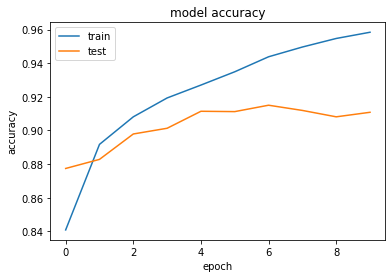

In [14]:
import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

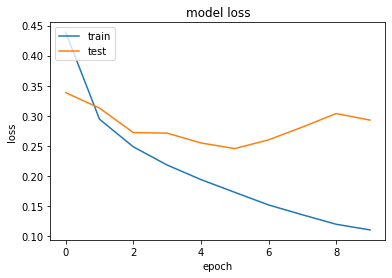

In [15]:

# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [16]:
# saving model 
hypermodel.save('fashionMnistUsingTuner.h5')